# API Project 

## (A)The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### (1)Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

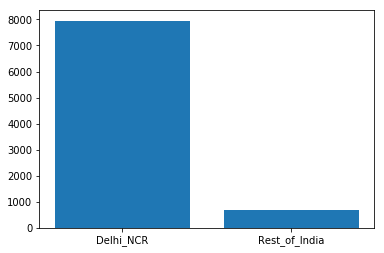

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
ef=df[df['Country Code']==1]
total_res=ef.City.count()
total_NCR=0
li=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
for i in li:
    tf=df[df.City==i]
    total_NCR+=tf.City.count()
Rest_res=total_res-total_NCR
li=[total_NCR,Rest_res]
li_1=['Delhi_NCR','Rest_of_India']
plt.bar(li_1,li)
plt.show()

### (2)Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
delhi_ncr_cuisines=[]
rest_cuisines=[]
total=[]
final_cuisines=[]
li=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad ']
ef=df[df['Country Code']==1]
kf=ef.copy()
def f(s):
    val=s.split(',')
    new=[]
    if len(val)==1:
        return val[0].strip()
    else:
        for i in val:
            new.append(i.strip())
        return new
            
kf['total_Cuisines']=ef.Cuisines.apply(f)
new=kf.total_Cuisines.value_counts()
new_val=new.index
for i in new_val:
    if type(i)==str:
        total.append(i)
    else:
        for j in i:
            total.append(j)
for i in li:
    def f(s):
        val=s.split(',')
        new=[]
        if len(val)==1:
            return val[0].strip()
        else:
            for i in val:
                new.append(i.strip())
            return new

    tf=ef[ef.City==i]
    kf=tf.copy()
    kf['new_cuisine']=tf.Cuisines.apply(f)
    new_val=kf.new_cuisine.value_counts()
    final_val=new_val.index
    for i in final_val:
        if type(i)==str:
            delhi_ncr_cuisines.append(i)
        else:
            for j in i:
                delhi_ncr_cuisines.append(j)
unique_delhi_ncr_cuisines=set(delhi_ncr_cuisines)                
unique_total=set(total)
for i in unique_total:
    if i not in unique_delhi_ncr_cuisines:
        final_cuisines.append(i)
        
for i in final_cuisines:
    print(i)

Cajun
BBQ
Malwani
German


### (3)Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
total=[]
final_dict={}
final_cuisine=[]
final_count=[]
ef=df[df['Country Code']==1]
kf=ef.copy()
def f(s):
    val=s.split(',')
    new=[]
    if len(val)==1:
        return val[0].strip()
    else:
        for i in val:
            new.append(i.strip())
        return new
            
kf['total_Cuisines']=ef.Cuisines.apply(f)
new=kf.total_Cuisines.value_counts()
new_val=new.index
for i in new_val:
    if type(i)==str:
        total.append(i)
    else:
        for j in i:
            total.append(j)
for i in total:
    if i in final_dict:
        final_dict[i]+=1 
    else:
        final_dict[i]=1
for k in range(10):
    maxi=-99999
    for i in final_dict:
        if final_dict[i]>maxi:
            val=i
            maxi=final_dict[i]
    final_cuisine.append(val)
    final_count.append(maxi)
    final_dict[val]=-99999999
for i in final_cuisine:
    print(i)

North Indian
Chinese
Continental
Italian
Fast Food
Cafe
South Indian
Street Food
Asian
Mughlai


### (4)Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

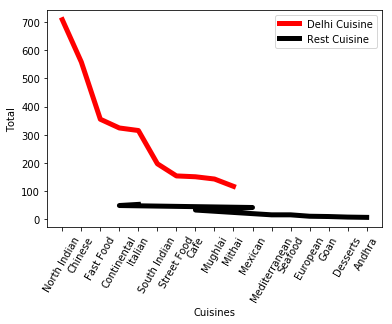

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
delhi_ncr_cuisines=[]
rest_cuisines=[]
total=[]
final_delhi_dict={}
final_rest_dict={}
top_10_delhi=[]
top_10_delhi_count=[]
top_10_rest=[]
top_10_rest_count=[]
li=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad ']
ef=df[df['Country Code']==1]
kf=ef.copy()
def f(s):
    val=s.split(',')
    new=[]
    if len(val)==1:
        return val[0].strip()
    else:
        for i in val:
            new.append(i.strip())
        return new
            
kf['total_Cuisines']=ef.Cuisines.apply(f)
new=kf.total_Cuisines.value_counts()
new_val=new.index
for i in new_val:
    if type(i)==str:
        total.append(i)
    else:
        for j in i:
            total.append(j)
for i in li:
    def f(s):
        val=s.split(',')
        new=[]
        if len(val)==1:
            return val[0].strip()
        else:
            for i in val:
                new.append(i.strip())
            return new

    tf=ef[ef.City==i]
    kf=tf.copy()
    kf['new_cuisine']=tf.Cuisines.apply(f)
    new_val=kf.new_cuisine.value_counts()
    final_val=new_val.index
    for i in final_val:
        if type(i)==str:
            delhi_ncr_cuisines.append(i)
        else:
            for j in i:
                delhi_ncr_cuisines.append(j)
rest_cuisines=total.copy()
for i in delhi_ncr_cuisines:
    if i in rest_cuisines:
        rest_cuisines.remove(i)
for i in delhi_ncr_cuisines:
    if i in final_delhi_dict:
        final_delhi_dict[i]+=1
    else:
        final_delhi_dict[i]=1
for i in rest_cuisines:
    if i in final_rest_dict:
        final_rest_dict[i]+=1
    else:
        final_rest_dict[i]=1
for k in range(10):
    maxi=-99999
    for i in final_delhi_dict:
        if final_delhi_dict[i]>maxi:
            val=i
            maxi=final_delhi_dict[i]
    top_10_delhi.append(val)
    top_10_delhi_count.append(maxi)
    final_delhi_dict[val]=-99999999
    
for k in range(10):
    maxi=-99999
    for i in final_rest_dict:
        if final_rest_dict[i]>maxi:
            val=i
            maxi=final_rest_dict[i]
    top_10_rest.append(val)
    top_10_rest_count.append(maxi)
    final_rest_dict[val]=-99999999
plt.plot(top_10_delhi,top_10_delhi_count,color='red',linewidth=5,label='Delhi Cuisine')
plt.plot(top_10_rest,top_10_rest_count,color='black',linewidth=5,label='Rest Cuisine')
plt.xlabel('Cuisines')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=60)
plt.show()

## (B)User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### (B.1)Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

### (1)Number of Votes given Restaurant

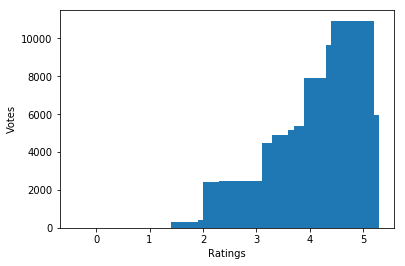

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
ratings=df['Aggregate rating'].values
votes=df['Votes'].values
np_ratings=np.array(ratings)
np_votes=np.array(votes)
plt.bar(np_ratings,np_votes)
plt.xlabel('Ratings')
plt.ylabel('Votes')
plt.show()


### (2)Restaurant serving more number of cuisines.

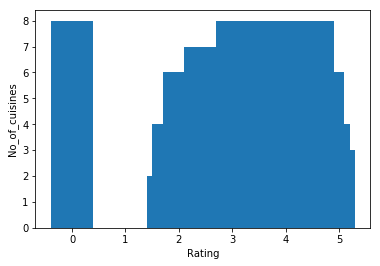

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
ratings=df['Aggregate rating'].values
np_ratings=np.array(ratings)
def f(s):
    if s!='':
        val=s.split(',')
        return len(val)
    return 0
kf=df.copy()
df.Cuisines.fillna('',inplace=True)
kf['no_of_cuisines']=df['Cuisines'].apply(f)
no_of_cuisines=kf['no_of_cuisines'].values
np_no_of_cuisines=np.array(no_of_cuisines)
plt.bar(np_ratings,np_no_of_cuisines)
plt.xlabel('Rating')
plt.ylabel('No_of_cuisines')
plt.show()

## (B.2)Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

### (1)Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
locality=[]
Weighted_Restaurant_Rating=[]
top_10_locality=[]
top_10_weighted=[]
new=df.Locality.value_counts()
new_val=new.index
for i in new_val:
    locality.append(i)
    tf=df[df.Locality==i]
    af=tf.copy()
    af['new_col']=tf['Votes']*tf['Aggregate rating']
    total=af.new_col.sum()
    count=af.Votes.sum()
    if count==0:
        continue
    weighted=total/count
    Weighted_Restaurant_Rating.append(weighted)
for k in range(10):
    maxi=-999999
    for i in range(len(Weighted_Restaurant_Rating)):
            if Weighted_Restaurant_Rating[i]>maxi:
                ind=i
                maxi=Weighted_Restaurant_Rating[i]
                max_locality=new_val[i]
    top_10_locality.append(max_locality)
    top_10_weighted.append(maxi)
    Weighted_Restaurant_Rating[ind]=-999999999999999
for i in top_10_locality:
    print(i)

Chatham-Kent
Lorne Street
Sheikh Sarai
Al Barari
Wakad
Dhantoli
Ashram Road
12th Square Building, Banjara Hills
Anjuna Beach, Anjuna
Boundary Street, Shoreditch


## (C)Visualization

### (1)Plot the bar graph top 15 restaurants have a maximum number of outlets.

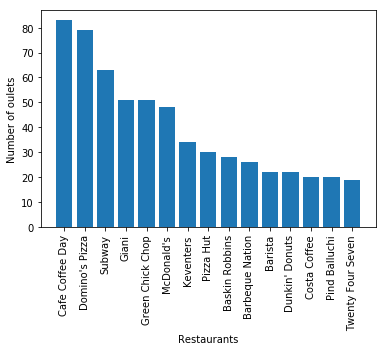

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
df['Restaurant Name'].replace("Giani's",'Giani',inplace=True)
new=df['Restaurant Name'].value_counts()
top_15_res=new.index[0:15]
top_15_out=new.values[0:15]
plt.bar(top_15_res,top_15_out)
plt.xlabel('Restaurants')
plt.ylabel('Number of oulets')
plt.xticks(rotation=90)
plt.show()

### (2)Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

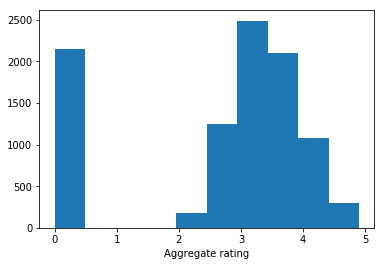

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
new=df['Aggregate rating']
plt.hist(new)
plt.xlabel('Aggregate rating')
plt.show()

### (3)Plot the bar graph top 10 restaurants in the data with the highest number of votes.

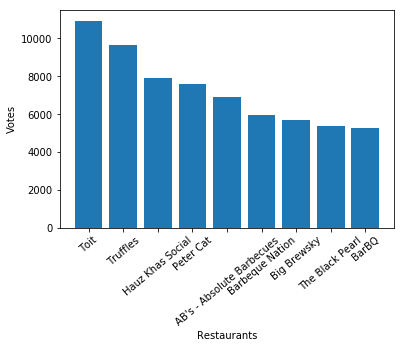

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
new_votes=df.Votes.values
top_10_res=[]
top_10_votes=[]
new_res_name=df['Restaurant Name'].values
for k in range(10):
    maxi=-999999
    for i in range(len(new_votes)):
        if new_votes[i]>maxi:
            ind=i
            maxi=new_votes[i]
            max_locality=new_res_name[i]
    top_10_res.append(max_locality)
    top_10_votes.append(maxi)
    new_votes[ind]=-999999999999
plt.bar(top_10_res,top_10_votes)
plt.xlabel('Restaurants')
plt.ylabel('Votes')
plt.xticks(rotation=40)
plt.show()

### (4)Plot the pie graph of top 10 cuisines present in restaurants in the USA.

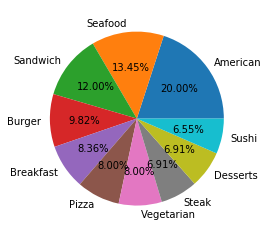

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
total=[]
final_dict={}
ef=df[df['Country Code']==216]
ef.Cuisines.fillna('',inplace=True)
tf=ef.copy()
final_cuisine=[]
final_count=[]
def f(s):
    if s!='':
        val=s.split(',')
        new=[]
        if len(val)==1:
            return val[0].strip()
        else:
            for i in val:
                new.append(i.strip())
            return new
    return 0       
kf['total_Cuisines']=tf.Cuisines.apply(f)
new=kf.total_Cuisines.value_counts()
new_val=new.index
for i in new_val:
    if i==0:
        continue
    if type(i)==str:
        total.append(i)
    else:
        for j in i:
            total.append(j)
for i in total:
    if i in final_dict:
        final_dict[i]+=1
    else:
        final_dict[i]=1
for k in range(10):
    maxi=-99999
    for i in final_dict:
        if final_dict[i]>maxi:
            val=i
            maxi=final_dict[i]
    final_cuisine.append(val)
    final_count.append(maxi)
    final_dict[val]=-99999999
plt.pie(final_count,labels=final_cuisine,autopct='%.2f%%')
plt.show()

### (5)Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

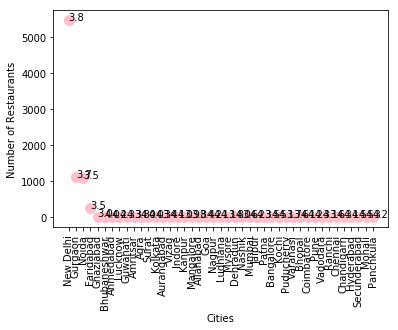

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/zomato.csv',encoding='ISO-8859-1')
df=iris.copy()
locality=[]
ef=df[df['Country Code']==1]
new=ef.City.value_counts()
Weighted_Restaurant_Rating=[]
res_name=new.index
no_of_res=new.values
for i in res_name:
    locality.append(i)
    tf=df[df.City==i]
    af=tf.copy()
    af['new_col']=tf['Votes']*tf['Aggregate rating']
    total=af.new_col.sum()
    count=af.Votes.sum()
    weighted=total/count
    Weighted_Restaurant_Rating.append(weighted)
Weighted_Restaurant_Rating = [ round(elem, 1) for elem in Weighted_Restaurant_Rating]
plt.scatter(res_name,no_of_res,s=100,color='pink')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
for i in range(len(Weighted_Restaurant_Rating)):
    plt.text(res_name[i],no_of_res[i],Weighted_Restaurant_Rating[i])
plt.show()